# Handwritten digit classification on Raspberry Pi Pico

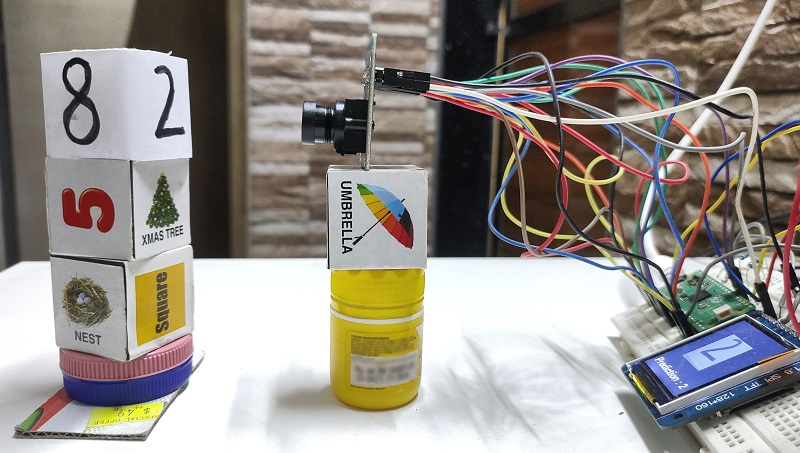

This is a companion notebook to my project '[Handwritten digit classification on Pi Pico](https://ashishware.com/2022/09/03/pipico_digit_classification/)'. This notebook contains code to:
- Train a ML model on MINST dataset to recognize hadwritten digits
- Export the model to pure python code so that it can be executed with CircuitPython

The [m2cgen](https://github.com/BayesWitnesses/m2cgen) is wonderful tool that can convert many ML models to pure python code

In [1]:
!pip install m2cgen

In [2]:
%matplotlib inline

Importing required libraries.

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, ensemble,tree,linear_model
from sklearn.model_selection import train_test_split
import m2cgen as m2c
import numpy as np
import cv2

Load the MINST hadwritten digit dataset.

In [4]:
data = datasets.load_digits()

The images in dataset are 8x8 pixel. We need to train our model on larger images to get better results, so we upscale images to 12x12 pixel

In [5]:
image_ds  = []
for img in data.images:
    res = cv2.resize(img, dsize=(12, 12))
    res = res/16
    image_ds.append(res)

Let's see a sample image

In [6]:
plt.imshow((image_ds[78]),cmap='gray')

Training a LinearSVC classifier on upscaled images

In [7]:
img_data = np.asarray(image_ds)
flattened_data = img_data.reshape((len(image_ds), -1))
clf = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(
    flattened_data, data.target, test_size=0.4, shuffle=False
)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

Let's visualize a image from test set and output it's prediction

In [8]:
plt.imshow(X_test[12].reshape((12,12)))
plt.show()
print("Predicted : " + str(predicted[12]))

In [9]:
 print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

### Testing our model
💡Tip :Use this block to debug. Paste image array dumped by the board to visualize them and see what's going on

In [22]:
arr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.648438, 0.820313, 0.828125, 0.75, 0.75, 0.75, 0.742188, 0, 0, 0, 0, 0, 0.65625, 0.757813, 0.648438, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0.65625, 0.75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.734375, 0.742188, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.75, 0.546875, 0.640625, 0.640625, 0, 0, 0, 0, 0, 0, 0, 0, 0.734375, 0.75, 0.742188, 0.742188, 0.75, 0.75, 0.546875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.734375, 0.648438, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.742188, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.75, 0, 0, 0, 0, 0, 0, 0.539063, 0, 0, 0, 0.65625, 0.75, 0, 0, 0]
b = np.asarray(arr).reshape((12,12))
plt.imshow(b,cmap='gray')
plt.show()
print('Prediction : ' + str(clf.predict([arr])[0]))

### Converting model to pure python code

First convert code to a python file.

In [11]:
import numpy as np
import sys
sys.setrecursionlimit(2147483647)
code = m2c.export_to_python(clf)
with open('svm.py', 'w') as f:
    f.write(code)

Then, minimize the file so that it occupies less space on Pi Pico's flash memory

In [12]:
!pip install python-minimizer 

In [13]:
!python-minimizer svm.py -o svm_min.py

In [14]:
!ls -alh svm_min.py

We have a 43kb model that can classify hand written digits without any external dependency ! For next steps visit : https://ashishware.com2022/09/03/pipico_digit_classification/